# Determining the Mass of the Neutrino

Vigilante is a code that shows the various methods to place constraints on the mass of the neutrino. These methods include experimental data and MonteCarlo Simulations. It is written in Python and run in a Jupyter Notebook. The notebook contains interactive code that allows the user to change plots and explore the effect of parameters on simulations. 

The Notebook is based off of the project designed for the PHYC90007 Masters Unit at the University of Melbourne. The file *Determing the mass of the neutrino.pdf* contains the final report. The report outlines the intermediate steps and justifications for using certain methods here. The document is able to be used separately and in conjunction with this notebook, depending on the user. 

The Neutrino has had a long history in physics, it was first postulated by Pauli in 1930 and 'discovered' around 1950 and colminated in a nobel prize. However, it's exact mass is not yet known. There are many experiments around the world aiming to determine its mass. These experiments, in order to gaim funding they need to show that they will actually see something. How can this be done? By numerical simulation. 

This notebook will teach you how to use your computer, through the programing language python, how do place some limits on the neutirno mass that can be used to inform future experiments. 

## Initialise

The first step in any computer simulation is to set the initial conditions and ensure that the cose can work. 
Python documentation and code is to import the desired packages. Packages are prewritten code that can do a variety of functions. There are many pros and cons for importing packages. The pros are that the amount of code that one needs to write will only be specific to what you need (i.e. how to import a particular data set, not data in general). The payoff for using these functions is that they often have many assumptions built into them and the steps used are often hidden within the source code.

* Many physics codes will always use numpy and, matplotlib, pandas is occasionally used, mainly for projects that require large data sets with many different columns and names. 

* A jupyter/IPython notebook specific package is *ipywidgets*. This package allows for the use of sliders, buttons and text inputs that are otherwise unable to be used in python codes that are run in a terminal. 

* Finally there are a number of functions that are called that have been written specifically for the project. These functions allow for the simpliciation of the notebook as it hides away the extra lines of code only showing the functions that give a readable output.

To run a cell press ```shift + return```.

In [1]:
# Python specific 
import pandas
import numpy as np
import matplotlib.pyplot as plt

# Notebook specific
import  ipywidgets as widgets

# Project specific 
import import_data
import LineFit
import RandomDist

import momenta

import density

/Users/kylaadams/UniMelbCourse/Computing/density.py:19: RuntimeWarning: overflow encountered in expm1
  f = lambda p: g/(2*pi**2)*(1/(np.expm1(p/T[i])))*p**2


## Experimental Data and Least Squares Fitting

The first thing most experimental physcists do before applying for grant funding is conduct a smaller experiment using materials already present in a lab. ```Chapter One ``` in the report outlines how exactly the data was collected. In general a radioactive source in placed within a vacuum chamber and as the radioactive elements decay a magnetic field redirects the daughter particles that carry a charge while the neutral neutrinos continue on. The figure below shows the experimental setup.

In [ ]:
#Extra experimental widget line
file = open("ExperimentalSetup.png", "rb")
image = file.read()
widgets.Image(
    value=image,
    format='png',
    width=500,
    height=600,
)

The first step in modelling experimental data is to analyse the data. First a function was written so that the desired data file (already specified in the documentation) is imported as a pandas array and each column is given the appropiate name. This function is then called in the *LineFit* file so that the data can then be plottedThe data can be imported by using the funtion import_data. This function will take the data file from a predetermined location then export each heading into various arrays.  
The cell below calls *import_data* function that is in the *LineFit* code and displays it if TRUE.

In [ ]:
 LineFit.data_show(show=True)

Specific headings can be displayed and assigned by using the array names in the LineFit package. Full column titles can be found in the Project report.

In [ ]:
LineFit.current

The data can then be manipulated as desired, calculations can be made and plots generated. The calculations relevant here is the determination of the Kurie Variable, what the Kurie Variable is is defined in the Project PDF. By plotting the Kurie Variable with the Kinetic energy cerThe one of interest in the Kinetic Energy verses the Kurie Variable. These data columns can be extracted from the above data set then plotted. The function plot within the LineFit code can be used to determine what parts of the kurie plot to show, the least squaares fit, the data line or the error bars. By changing the ```fitshow```, ```linfit``` and ```Errorbar``` options the plot below can be altered as desired.


In [ ]:
LineFit.plot(fitshow = True, linfit=True, Errorbar=True)

In [6]:
Grad, E0 = LineFit.returnGradC()
print('The Gradient is: ',Grad, '\nThe Intercept is:', E0)

The Gradient is:  -5.91398941148e+20 
The intercept is: 1.26172101231e+23


  From this linear fit limitations on the mass of the neutrino can be made. The End of ```Chapter 1``` in the project PDF shows these equations and places a limit on the neutrino mass to be ___.

## Monte Carlo Simulations
In addition to experimental data, another method used by experimental physcists prior to building expensive detectors is computer simulations. By using these simulations limits can be placed on the mass of the neutrino is by using computer simulations. 
These simulations rely on the generation of random numbers to attempt and recreate real life experiments. These random numbers are never truly random. As computers use algortihms to generate their values. These algorithms rely on each previous calculation, this is a Monte Carlo calculation. The accompanying report ```Chapter 2``` outlines how the code is generated, the flowchart of how the code operates can be seen below. 

In [7]:
file = open("FlowChartRandDist.jpeg", "rb")
image = file.read()
widgets.Image(
    value=image,
    format='png',
    width=500,
    height=600,
)

A Jupyter Widget

This next line of code calles a function from the python script ```RandomDist``` called ```RandomGen```. The function takes the inputs (number of samples, mean value and the standard deviation.

In [8]:
RandomDist.RandomGen(10,1,2)

array([  5.01472716,  -6.5681946 ,  -7.85348876, -26.94151698,
         5.68308831,   4.2425595 ,   4.90177868,  41.10722693,
         4.76056914,  -1.13857973])

By using this Random uniform number generator, the distribuions of the momenta from two different sources, Pions and Kaons. In a neutrino beam experiment a combination of these fundamental particles are used, around 86% Pions and 14% Kaons. To mimick these distributions a shifted uniform of momenta. These distributions can be seen below. The distributions are separated in their Longitudinal and Transverse.

Plotting the momenta distribution of decaying pions...
Plotting the momenta distribution of decaying kaons...


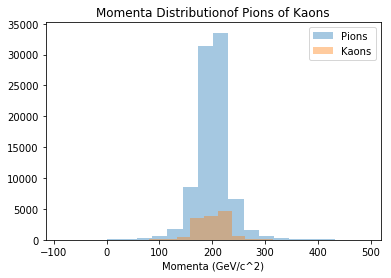

In [9]:
MomentaDistribution, Distance = momenta.outputDistributions()
momenta.plothist(MomentaDistribution, pion=True, kaon = True, Title = 'Momenta Distribution')

The plot below shows the transverse distance travelled by the pions and Kaons in the Lab frame. The previous momenta distributions have been lorentz transformed and the distances travelled have then been calculated. 

Plotting the momenta distribution of decaying kaons...


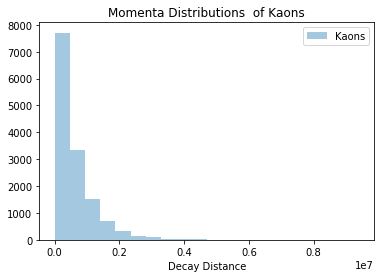

In [10]:
momenta.plothist(Distance, pion=False, kaon=True, label = 'Decay Distance')

As stated in the Report attached, the generated momenta can be separated into their transverse and longitudinal components. These are the trajectories that are important in the determination of whether a neutrino will hit a detector or not. If the longituninal momenta is smaller than the length of the tube remaining then they will not hit, or if their transverse momenta are larger than the size of the neutrino detector place then the neutrinos will also miss. 

A schematic of these momenta can be found below. The neutrino beam is travelling along the horizontal axis from left to right. Once the mesons have undergone a decay, the resultant neurinos will travel along a trajectory deflected from teh horizontal by an angle theta. By calculating the transverse and longtitudinal momenta the percentage of neutrino incident on the plate can be found.

In [11]:
file = open("Momenta.jpeg", "rb")
image = file.read()
widgets.Image(
    value=image,
    format='png',
    width=500,
    height=600,
)

A Jupyter Widget

In [12]:
lMomenta, tMomenta = momenta.outputMomenta()

Plotting the momenta distribution of decaying pions...
Plotting the momenta distribution of decaying kaons...


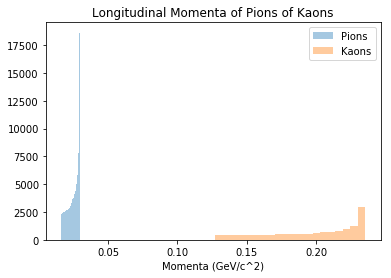

In [13]:
momenta.plothist(lMomenta, pion=True, kaon=True, Title = 'Longitudinal Momenta ')

Plotting the momenta distribution of decaying kaons...


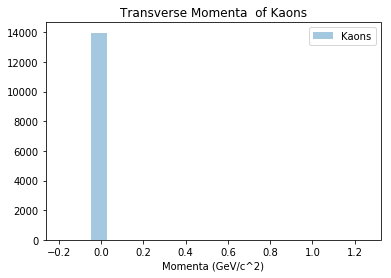

In [14]:
momenta.plothist(tMomenta, pion=False, kaon=True, Title = 'Transverse Momenta ')

In [15]:
momenta.percentagedetect(pion = True, kaon = False)

Percentage Detected  0.9999418604651162 %


## Cosmology

The measurement of the cosmic microwave background lead to the ability to place constraints on the mass of the neutrino. In the early universe neutrinos were at a much higher density than the current day. By determining this density as a function of time the total mass of the neutrino (including the three flavours) can be determined. Here the masses themselves will not be determined, but the methods able to be utilised will be shown.

The relative number density of neutrinos (relative to the current day) can be determined through the use of the relation $\frac{dr_X}{dt} = -\beta_X n_\gamma\left(r_X^2 - r_{X,eq}^2\right)$. By integrating this equation using a prebuilt Scipy function ```scipy.integrate.quad``` the relative number density as a function of temperature (in eV) can be determined. The function ```plotdensity()``` shows the result of this integration.

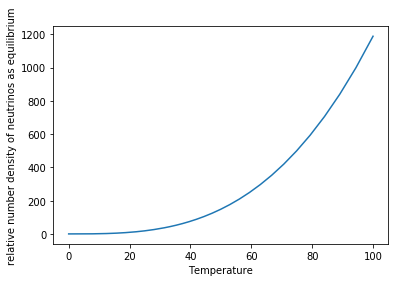

In [16]:
density.plotdensity()

The reltative number density increases with temperature, which is expected. The next step to understand the neutrino mass from cosmology is to determine the effect of the mass on the relative density.

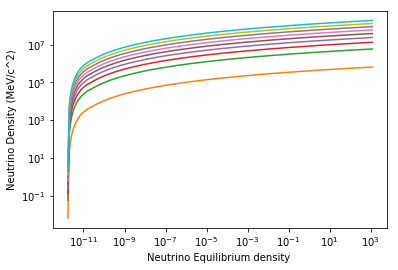

In [17]:
density.plotMassTemp()


The plot above shows different neutrino masses in the different colours. THis shows that the mass of the neutrino effects the relative density. By comparing the densities expected to give the comsic microwave background that is observed today the necessaty neutrino mass can be determined. THis has been done by many cosmologists. One of the current limits is  $\sum m_\nu < 0.17 eV$ at 95\% confidence. 